In [77]:
import pandas as pd  
# Pandas es una biblioteca de Python utilizada para manipulación y análisis de datos, proporcionando estructuras de datos flexibles y herramientas para trabajar con datos tabulares.

import numpy as np  
# NumPy es una biblioteca fundamental para cálculos numéricos en Python, especialmente para operaciones con matrices y arreglos.

import matplotlib.pyplot as plt  
# Matplotlib es una biblioteca de visualización de datos en Python que se utiliza para crear gráficos estáticos, como gráficos de líneas, histogramas, gráficos de dispersión, etc.

import seaborn as sns  
# Seaborn es una biblioteca de visualización de datos en Python basada en Matplotlib, que proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.

from sklearn import metrics  
# Scikit-learn es una biblioteca de aprendizaje automático en Python. En este caso, se está importando el módulo 'metrics', que incluye métricas comunes para evaluar el rendimiento de modelos de aprendizaje automático.

from sklearn.model_selection import train_test_split  
# Este módulo de Scikit-learn proporciona funciones para dividir conjuntos de datos en conjuntos de entrenamiento y prueba.

from sklearn.linear_model import LogisticRegression  
# Scikit-learn también proporciona implementaciones de varios algoritmos de aprendizaje automático, incluida la regresión logística, que es un método utilizado para problemas de clasificación.

from sklearn.feature_selection import SelectKBest  
# Scikit-learn incluye métodos para la selección de características, como SelectKBest, que selecciona las mejores características basadas en pruebas estadísticas.

from sklearn.feature_selection import chi2  
# Este módulo proporciona la función chi2, que es una medida de la relación entre dos variables categóricas y se utiliza en la selección de características.

from sklearn.preprocessing import StandardScaler  
# Scikit-learn también proporciona herramientas para preprocesar datos, como StandardScaler, que estandariza características escalando cada característica a media cero y varianza unitaria.

from sklearn.ensemble import RandomForestClassifier  
# RandomForestClassifier es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y fusiona sus predicciones para obtener una predicción final.

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix  
# La matriz de confusión es una herramienta que se utiliza para evaluar el rendimiento de un modelo de clasificación, y este módulo de Scikit-learn proporciona funciones para calcularla.

In [14]:
"""Cargar datos en Python y almacenarlos en la variable Datos"""

Datos = pd.read_csv('heart_cleveland_upload.csv')


In [23]:
"""Iniciamos explorando los datos para su debido analisis"""
print(Datos.head())
print(Datos.describe())
print(Datos.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

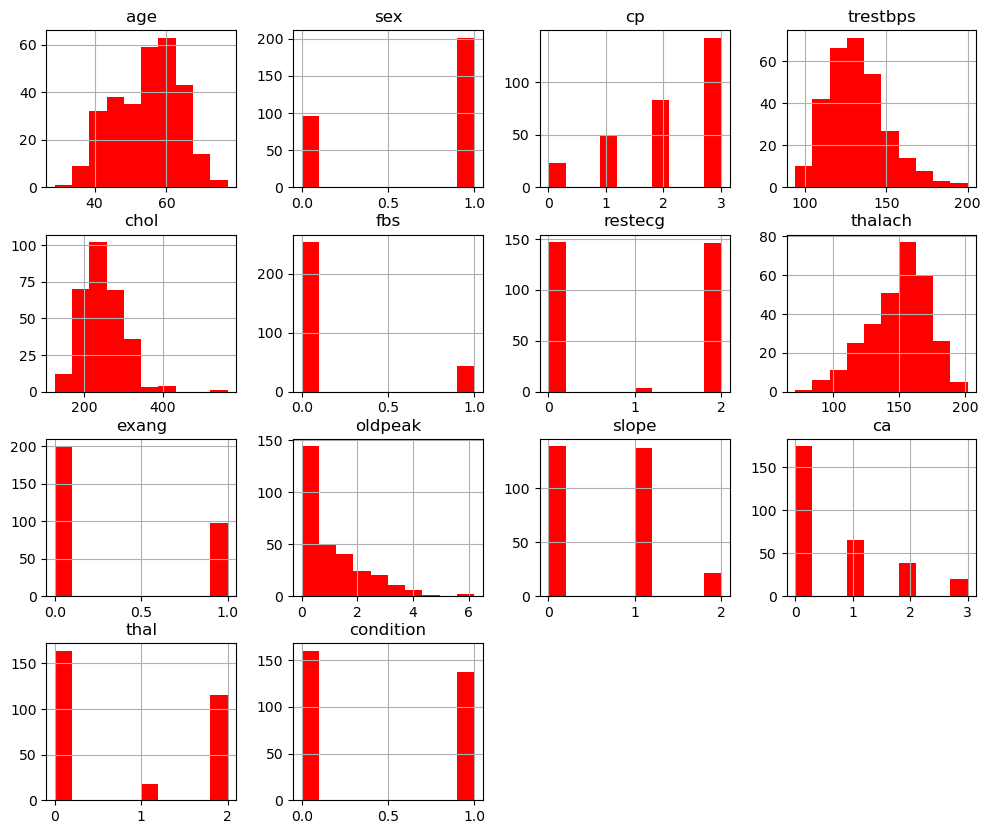

In [35]:
"""GRAFICOS DE HISTOGRAMAS, VARIABLES NUMÉRICAS"""
Datos.hist(figsize=(12, 10), color= "red")
plt.show()

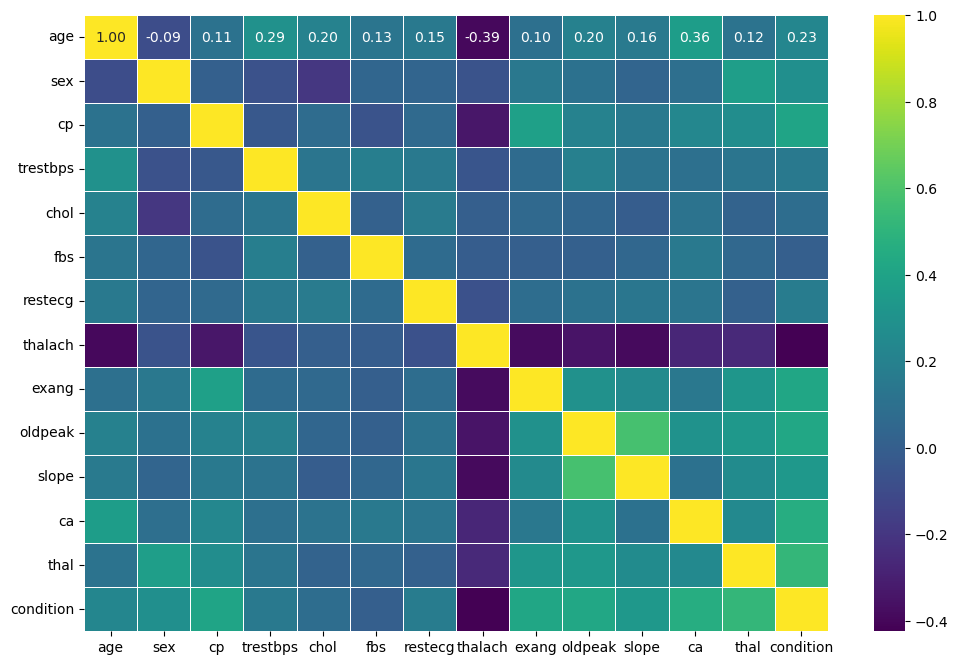

In [43]:
"""GRAFICO MATRIZ DE CORRELACIÒN"""
plt.figure(figsize=(12, 8))
sns.heatmap(Datos.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.show()

In [46]:
"Comprobar la presencia de valores faltantes en el conjunto de datos"
missing_values = Datos.isnull().sum()
print("Valores faltantes por columna:\n", missing_values
    )

Valores faltantes por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [47]:
"""PERSONAS CON CONDICION CARDIACA"""
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [52]:
styled_data = Datos[['condition']].head(40).style.set_properties(**{'color': 'blue'})
styled_data

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [75]:
"""Se define el porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%"""
"""Se crean variables X y Y para almacenar la información del entrenamiento"""

X = Datos.drop('condition',axis=1) 
"""Hace cargar los datos train sin los datos de la columna condition"""

Y = Datos['condition'] 
"""Se cargan los datos de train con los datos de la la columna condition"""

"""La función train_test_split divide un conjunto de datos en dos bloques: uno de entrenamiento y otro de prueba (train y test)"""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [60]:
print (X_train),(Y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

(None,
 234    1
 82     0
 36     0
 237    1
 133    1
       ..
 291    1
 195    1
 170    1
 135    0
 293    1
 Name: condition, Length: 222, dtype: int64)

In [61]:
"""Construimos el modelo de regresión logística"""

modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

"""Modelo de prediccion"""
Prediccion = modelo_regresion.predict(X_test) 

In [72]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [73]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [78]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



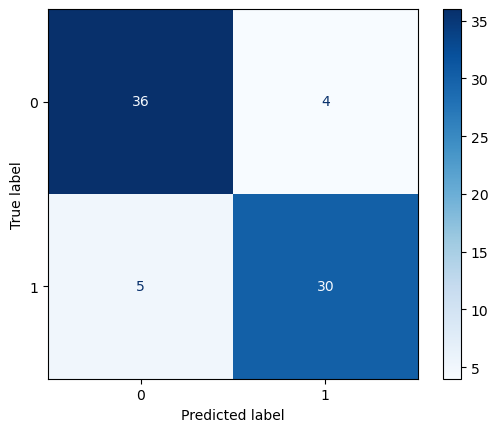

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Configurar el color deseado (por ejemplo, 'Blues')
disp.plot(cmap='Blues')

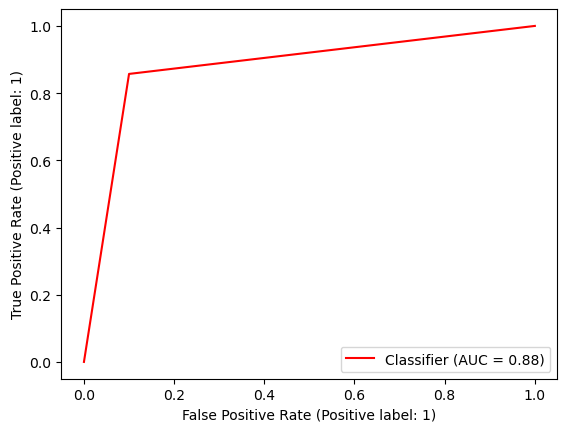

In [81]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion, color= "red")
plt.show()

In [ ]:
"""Humberto Jose Rincon Mora"""